# 1999 2P6 Q3 Simulation

(a) Define the terms _closed-loop characteristic equation_ and _closed-loop poles_ for the feedback system of Fig. 2. 

(b) If 
$$G(s) = \frac{1}{1+s^2} \qquad K(s) = k\frac{s+1}{s+a}$$
, find the values of $k$ and $a$ for which the two closed-loop poles are located at 
$$s = -1 \pm 2j$$

(c) Using the new values $k = 13$ and $a = 7$, sketch the Bode diagram of $K(s)G(s)$, and testimate the phase margin of the feedback system. 
$$K(s) = \frac{8(s+0.5)}{s+4}$$
Modify your Bode plots to take account of this controller and determine the new gain and phase margins, showing your constructions clearly. 

![alt text](images/1999_2P6_Q3_Fig_2.png)

Figure 2

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import control as ctr

### Part (a)

Transfer function is given by:
$$\frac{G(s)}{1+G(s)K(s)}$$

By considering the denominator, we have:

- Closed-loop characteristic equation: $1+G(s)K(s) = 0$
- Closed-loop poles: Solutions of $1+G(s)K(s) = 0$

### Part (b)

Solve the closed-loop characteristic equation
$$1 + k \left( \frac{s+1}{s+a} \right)\frac{1}{s^2+1}$$
$$(s^2+1)(s+a) + k (s+1)$$

Set $s = -1 + 2j$: (Note: $s^2 = -3 - 4j$)
$$(-2-4j)(a-1+2j) + k(2j) = 0 $$
$$-2a - 2 - 4j - 4aj + 4j + 8 + 2kj = 0 $$
$$(10-2a) + (2k-4a)j = 0$$

Setting real part = 0, we have $a=5$. 
Setting imaginary part = 0 and $a=5$, we have $k = 10$. 

### Part (c)

If $k = 13$ and $a = 7$, the open-loop transfer function 
$$K(s)G(s) = \frac{13(s+1)}{(s+7)(s^2+1)}$$
(Expanding the denominator for Python control we have $K(s)G(s) = \dfrac{13s+13}{s^3 + 7s^2 + s + 7}$)

Frequency response:
$$K(j\omega)G(j\omega) = \frac{13}{7} \left[ \frac{(j\omega+1)}{(\frac{j\omega}{7}+1)(1 - \omega^2)} \right]$$

It is always a good idea to normalise the real term for linear factors to spot 

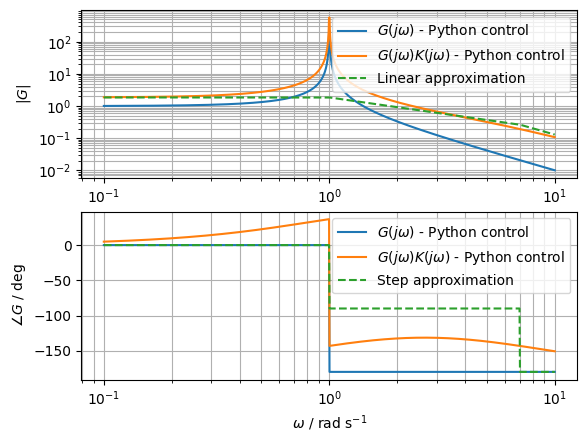

In [7]:
'''Define the transfer functions G and GK'''
G = ctr.tf([1], [1, 0, 1])
GK = ctr.tf([13, 13], [1, 7, 1, 7])     # Arguments of ctr.tf are [num], [dem]

'''Define array of frequencies spaced logarithmically'''
omegas = np.logspace(-1, 1, 1000)

'''Get array of the magnitudes and phases'''
# For G alone 
mag_G = ctr.frequency_response(G, omegas).magnitude     # Gets array of magnitudes from the frequency response function
phase_rad_G = ctr.frequency_response(G, omegas).phase   # Gets array of phases from the frequency response function

# For GK 
mag_GK = ctr.frequency_response(GK, omegas).magnitude   
phase_rad_GK = ctr.frequency_response(GK, omegas).phase 

# Unwrap to get continuous phase
phase_rad_G = np.unwrap(phase_rad_G)    # The unwrap function adds 2n*pi to an angle (rad) to maintain continuity. See https://numpy.org/doc/stable/reference/generated/numpy.unwrap.html
phase_rad_GK = np.unwrap(phase_rad_GK) 

# Convert phase to degrees
phase_deg_G = phase_rad_G / (np.pi) * 180
phase_deg_GK = phase_rad_GK / (np.pi) * 180

'''Linear approximation'''
def GK_linear_approx():

    # initialise magnitude and phase lists
    mag_list = []
    phase_list = []

    # calculate magnitude and phase
    for omega in omegas:
        if omega < 1:
            mag_list.append(13/7)
            phase_list.append(0)
        elif omega < 7:
            mag_list.append(13/7 / omega)
            phase_list.append(-90)
        else:
            mag_list.append(13 / omega**2)
            phase_list.append(-180)
    
    return mag_list, phase_list


'''Define plot'''
def G_plot():
    plt.figure()

    # Bode magnitude plot
    plt.subplot(2, 1, 1)

    # Calculated using the control package
    plt.loglog(omegas, mag_G,  label=r'$G(j \omega)$ - Python control')
    plt.loglog(omegas, mag_GK, label=r'$G(j \omega)K(j \omega)$ - Python control')

    # Calculated using the linear approximation
    plt.loglog(omegas, GK_linear_approx()[0], label='Linear approximation', linestyle='dashed')

    plt.grid(visible=True, which='major', axis='both')
    plt.grid(visible=True, which='minor', axis='both')
    plt.ylabel(r'$|G|$')
    plt.legend()

    # Bode phase plot
    plt.subplot(2, 1, 2)

    # Calculated using the control package
    plt.semilogx(omegas, phase_deg_G,  label=r'$G(j \omega)$ - Python control')
    plt.semilogx(omegas, phase_deg_GK, label=r'$G(j \omega)K(j \omega)$ - Python control')

    # Calculated using the linear approximation 
    plt.semilogx(omegas, GK_linear_approx()[1], label='Step approximation', linestyle='dashed')

    plt.grid(visible=True, which='major', axis='both')
    plt.grid(visible=True, which='minor', axis='both')
    plt.ylabel(r'$\angle G$ / deg')
    plt.xlabel(r'$\omega$ / rad s$^{-1}$')
    plt.legend()

    plt.show()

G_plot()

### Appendix: Generating linear approximations on a log-log plot 

For 2000 2P6 Q3, a derivation for the linear approximations of a semi-log plot was attached. However, for a log-log plot, different techniques must be used. 

Here, we used $\lim_{\omega \to \infty} {G(j\omega)K(j\omega)}$ while ignoring the terms which should have no effect. i.e., 

